# TOPIC MODELLING 

#### We wiil use _http://www.presidency.ucsb.edu/sou.php_ to get all the state the union speeches.

In [7]:
import requests
from bs4 import BeautifulSoup

# URL for the State of the Union speeches page
url = 'http://www.presidency.ucsb.edu/sou.php'

response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # make a list to store all the sou speechs 
    href_list = []
    
    # find the href in td and store it in href_list
    for td in soup.find_all("td"):
        a_tag = td.find("a")
        if a_tag is not None and a_tag.get("href") is not None:
            href = a_tag.get("href")
            href_list.append(href)

    

In [8]:
href_list # Checking if the list contains all the valid links 

['https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-3',
 'https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-28',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=123408',
 'https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-25',
 'https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-26',
 'https://www.presidency.ucsb.edu/documents/address-before-joint-session-the-congress-the-state-the-union-27',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=102826',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=104596',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=108031',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=111174',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=85753',
 'https://www.presidency.ucsb.edu/ws/index.php?pid=87433',
 'https://www.presidency.ucsb.edu/ws/index.php?p

### Now, let's try to get a single speech.  

In [9]:
speech_response = requests.get("https://www.presidency.ucsb.edu/ws/index.php?pid=3996")

if speech_response.status_code == 200:
    response = BeautifulSoup(speech_response.content, 'html.parser')
    
    # Finding the speech 
    field_docs_content = response.find('div', {'class': 'field-docs-content'})
    paragraphs = field_docs_content.find_all('p')
    
    president = response.find("h3", class_="diet-title").text
    date = response.find("span", class_="date-display-single").text
    
    print(president + ": " + date)

Richard Nixon: February 02, 1973


### Looks like the python script is working for Nixon's speech. Now we can try this for our `href_list` list :

In [10]:
import os

# store all the speeches in a dir.
folder_name = 'state_of_the_union_of_us_presidents'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)



# Loop over href_list and download each speech
for link in href_list:
    try:
        speech_response = requests.get(link)
        if speech_response.status_code == 200:
            response = BeautifulSoup(speech_response.content, 'html.parser')
            
            # find the speech
            field_docs_content = response.find('div', {'class': 'field-docs-content'})
            paragraphs = field_docs_content.find_all('p')
            
            # find the name of the president and the date 
            president = response.find("h3", class_="diet-title").text
            date = response.find("span", class_="date-display-single").text
            file_name = president + ": " + date +'.txt'
            
            print(file_name)
            # Store the speech  
            file_path = os.path.join(folder_name, file_name)
            
            with open(file_path , 'w') as file:
                for p in paragraphs:
                    file.write(p.text + '\n')
    except:
        print('Invalid URL')
        continue


Joseph R. Biden: April 28, 2021.txt
Joseph R. Biden: March 01, 2022.txt
Donald J. Trump: February 28, 2017.txt
Donald J. Trump: January 30, 2018.txt
Donald J. Trump: February 05, 2019.txt
Donald J. Trump: February 04, 2020.txt
Barack Obama: February 12, 2013.txt
Barack Obama: January 28, 2014.txt
Barack Obama: January 20, 2015.txt
Barack Obama: January 12, 2016.txt
Barack Obama: February 24, 2009.txt
Barack Obama: January 27, 2010.txt
Barack Obama: January 25, 2011.txt
Barack Obama: January 24, 2012.txt
George W. Bush: February 02, 2005.txt
George W. Bush: January 31, 2006.txt
George W. Bush: January 23, 2007.txt
George W. Bush: January 28, 2008.txt
George W. Bush: February 27, 2001.txt
George W. Bush: January 29, 2002.txt
George W. Bush: January 28, 2003.txt
George W. Bush: January 20, 2004.txt
William J. Clinton: February 04, 1997.txt
William J. Clinton: January 27, 1998.txt
William J. Clinton: January 19, 1999.txt
William J. Clinton: January 27, 2000.txt
William J. Clinton: February

James Monroe: December 02, 1817.txt
James Monroe: November 16, 1818.txt
James Monroe: December 07, 1819.txt
James Monroe: November 14, 1820.txt
James Madison: December 07, 1813.txt
James Madison: September 20, 1814.txt
James Madison: December 05, 1815.txt
James Madison: December 03, 1816.txt
James Madison: November 29, 1809.txt
James Madison: December 05, 1810.txt
James Madison: November 05, 1811.txt
James Madison: November 04, 1812.txt
Thomas Jefferson: December 03, 1805.txt
Thomas Jefferson: December 02, 1806.txt
Thomas Jefferson: October 27, 1807.txt
Thomas Jefferson: November 08, 1808.txt
Thomas Jefferson: December 08, 1801.txt
Thomas Jefferson: December 15, 1802.txt
Thomas Jefferson: October 17, 1803.txt
Thomas Jefferson: November 08, 1804.txt
John Adams: November 22, 1797.txt
John Adams: December 08, 1798.txt
John Adams: December 03, 1799.txt
John Adams: November 22, 1800.txt
George Washington: December 03, 1793.txt
George Washington: November 19, 1794.txt
George Washington: Dece

### Now, we can combine all the speechs in a single text file. 

In [11]:

folder_path = "state_of_the_union_of_us_presidents"
output_file = "sou_combined.txt"

with open(output_file, "w") as outfile:
    for filename in os.listdir(folder_path):
        print(filename)
        with open(os.path.join(folder_path, filename), "r") as infile:
            outfile.write(infile.read() + "\n")


Franklin D. Roosevelt: January 04, 1935.txt
James Madison: September 20, 1814.txt
Lyndon B. Johnson: January 14, 1969.txt
James Buchanan: December 19, 1859.txt
James Monroe: November 14, 1820.txt
Andrew Jackson: December 06, 1836.txt
Andrew Jackson: December 08, 1829.txt
Franklin Pierce: December 02, 1856.txt
John Quincy Adams: December 05, 1826.txt
William Howard Taft: December 06, 1910.txt
James Buchanan: December 08, 1857.txt
Theodore Roosevelt: December 07, 1903.txt
Dwight D. Eisenhower: January 05, 1956.txt
Lyndon B. Johnson: January 08, 1964.txt
George Washington: October 25, 1791.txt
Calvin Coolidge: December 06, 1923.txt
Joseph R. Biden: March 01, 2022.txt
Andrew Johnson: December 04, 1865.txt
Grover Cleveland: December 06, 1886.txt
Chester A. Arthur: December 06, 1881.txt
Jimmy Carter: January 25, 1979.txt
William McKinley: December 06, 1897.txt
Jimmy Carter: January 16, 1981.txt
Grover Cleveland: December 06, 1887.txt
Richard Nixon: February 15, 1973.txt
Grover Cleveland: Dec

## Let's use wordcloud to visualize the most important texts

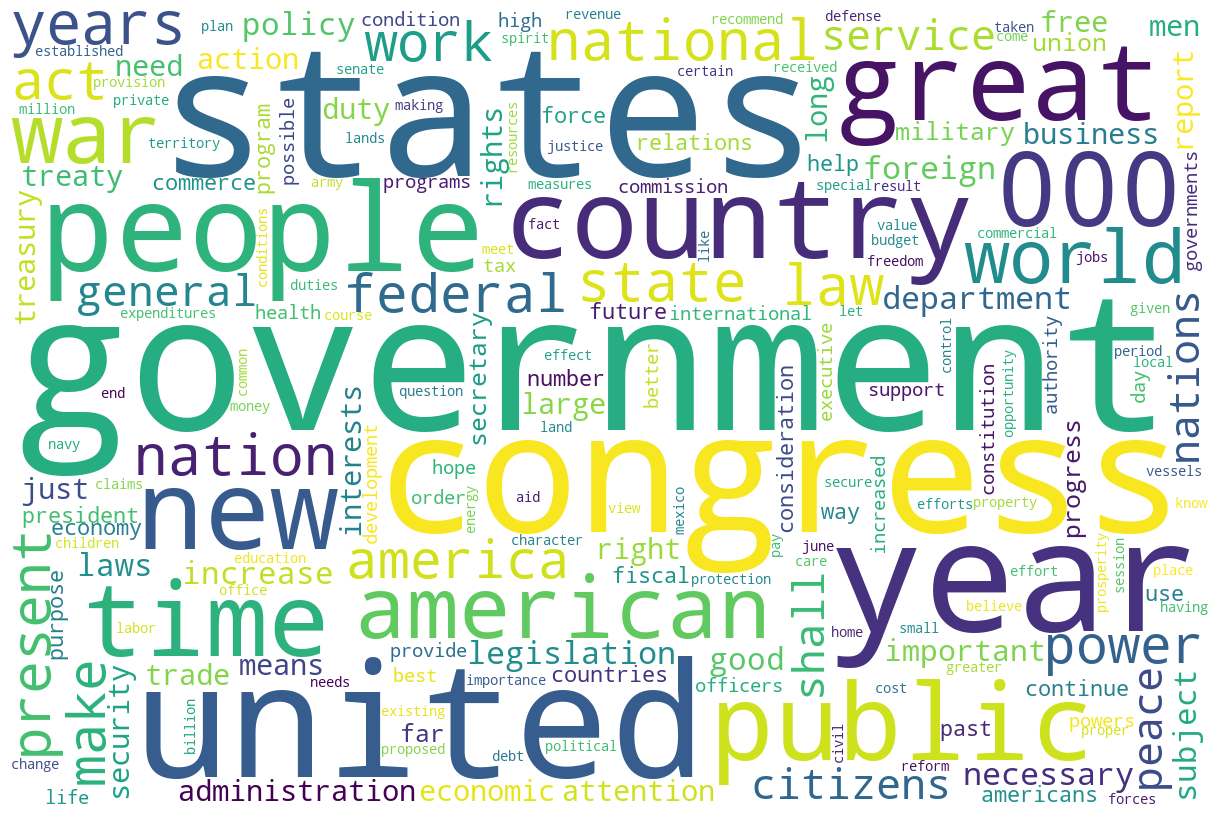

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open("sou_combined.txt", "r") as file:
    text = file.read()

# Use CountVectorizer to tokenize the text and count the frequency of each word
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform([text]).toarray().ravel()


# Create a wordcloud from the word counts
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), word_counts)))

# Plot the wordcloud
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()


### Applying LDA (LatentDirichletAllocation) from Scikit-Learn :

In [1]:
# Importing the libraries 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [2]:
with open("sou_combined.txt", "r") as file:
    text_data = file.read()

    
    
text = text_data.split("\n")    

# Convert text data into a bag of words representation
tf_vectorizer = CountVectorizer(stop_words='english')
tf = tf_vectorizer.fit_transform(text)

# Apply LDA to the bag of words representation
lda = LatentDirichletAllocation(n_components=20, learning_method='online', random_state=0)
lda_topics = lda.fit_transform(tf)

lda.components_

array([[0.05      , 0.05      , 0.05      , ..., 0.05000001, 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05000001, 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05000004],
       ...,
       [0.05      , 0.05      , 0.05000001, ..., 0.05      , 0.05000003,
        1.22797083],
       [0.05      , 0.05      , 0.05      , ..., 0.05000001, 0.05000001,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05000002,
        0.05000032]])

#### The pyLDAvis package was last updated on 2021. I was having a depreceted version issue. So, I cloned the repo and updated the deprecated function.


In [4]:
!git clone https://github.com/rxxxxxxb/pyLDAvis.git

Cloning into 'pyLDAvis'...
remote: Enumerating objects: 1154, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 1154 (delta 45), reused 82 (delta 41), pack-reused 1053
Receiving objects: 100% (1154/1154), 4.49 MiB | 9.21 MiB/s, done.
Resolving deltas: 100% (689/689), done.


In [5]:
!pip install pyLDAvis/

Processing ./pyLDAvis
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached gensim-4.3.0-cp39-cp39-macosx_10_9_x86_64.whl (24.0 MB)
  Using cached future-0.18.3-py3-none-any.whl
  Using cached sklearn-0.0.post1-py3-none-any.whl
  Using cached funcy-1.18-py2.py3-none-any.whl (33 kB)
  Using cached FuzzyTM-2.0.5-py3-none-any.whl (29 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached pyFUME-0.2.25-py3-none-any.whl (67 kB)
  Using cached fst_pso-1.8

In [11]:
## I had to use this filter cause I was still having so many new deprecated version issues. 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import pyLDAvis
    import pyLDAvis.sklearn


# Visualize using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(vis)

# I couldn depreceted in the new scikit-learn update. 